In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
import nltk
nltk.download('punkt_tab') # download 'punkt_tab' resource
nltk.download('wordnet') #download 'wordnet' resource
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df_train['text'] = [word_tokenize(entry) for entry in df_train['text']] # Tokenize

In [ ]:
df_test['text'] = [word_tokenize(entry) for entry in df_test['text']]

In [ ]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df_train['text']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag below will provide the 'tag' if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    df_train.loc[index,'text_final'] = str(Final_words)

    #Est. time to run 24s

In [ ]:
df_train.head()

,id,keyword,location,text,target,text_final
0,1,NaN,NaN,"[Our, Deeds, are, the, Reason, of, this, #, ea...",1,"['Our', 'Deeds', 'Reason', 'earthquake', 'May'..."
1,4,NaN,NaN,"[Forest, fire, near, La, Ronge, Sask, ., Canada]",1,"['Forest', 'fire', 'near', 'La', 'Ronge', 'Sas..."
2,5,NaN,NaN,"[All, residents, asked, to, 'shelter, in, plac...",1,"['All', 'resident', 'ask', 'place', 'notify', ..."
3,6,NaN,NaN,"[13,000, people, receive, #, wildfires, evacua...",1,"['people', 'receive', 'wildfire', 'evacuation'..."
4,7,NaN,NaN,"[Just, got, sent, this, photo, from, Ruby, #, ...",1,"['Just', 'get', 'send', 'photo', 'Ruby', 'Alas..."


In [ ]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df_test['text']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    df_test.loc[index,'text_final'] = str(Final_words)

#Est. time to run 12s

In [ ]:
df_test['target'] = ''

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
x = Tfidf_vect.fit_transform(df_train['text_final'])
x_test = Tfidf_vect.transform(df_test['text_final'])
y = df_train['target']

In [ ]:
#Split into validation and training sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)#ts = 0.2

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(kernel='rbf', C=1.0,  class_weight='balanced', random_state=42) #default 'rbf' kernal
svm_model.fit(x_train, y_train)

pred = svm_model.predict(x_val)

accuracy_svm = accuracy_score(y_val, pred)

print(f"Valid Accuracy: {accuracy_svm:.2f}")

print("\nClassification:")
print(classification_report(y_val, pred))

print("\nConfusion:")
print(confusion_matrix(y_val, pred))

Valid Accuracy: 0.79

Classification:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       874
           1       0.79      0.70      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.79      1523
weighted avg       0.79      0.79      0.79      1523


Confusion:
[[753 121]
 [192 457]]


In [ ]:
#test_pred = svm_model.predict(x_test)
#df_test['target'] = test_pred

In [ ]:
#sub_file = df_test[['id', 'target']]
#sub_file.to_csv('submission.csv', index=False)

In [ ]:
#print(sub_file.head(10))

### TSNE GRAPH

In [ ]:
#!pip install --upgrade numpy
#!pip install --force-reinstall gensim

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('train.csv')
data['text_stop'] = ''
data.head(5)

,id,keyword,location,text,target,text_stop
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,


In [ ]:
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")

    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)

    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")

    for col in ['text', 'text_stop']:
        data[col] = data[col].apply(clean_sentence)

    return data

data = clean_dataframe(data)
data.head(5)

,id,keyword,location,text,target,text_stop
31,48,ablaze,Birmingham,bbcmtd wholesale markets ablaze httptcolhyxeohy6c,1,
32,49,ablaze,Est. September 2012 - Bristol,bring heavy metal rt httptcoyao1e0xngw,0,
33,50,ablaze,AFRICA,africanbaze breaking newsnigeria flag set abla...,1,
34,52,ablaze,"Philadelphia, PA",crying set ablaze,0,
35,53,ablaze,"London, UK",side sky night ablaze httptcoqqsmshaj3n,0,


In [ ]:
data['text'] = [word_tokenize(entry) for entry in data['text']] # Tokenize

In [ ]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(data['text']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag below will provide the 'tag' if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    data.loc[index,'text_final'] = str(Final_words)


In [ ]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['text', 'text_final']:
        for sentence in data[col].items():
            # Check if sentence[1] is a string (for 'text_final' column)
            if isinstance(sentence[1], str):
                # If it's a string, split it into words and append to corpus
                word_list = sentence[1].strip('[]').replace("'", "").split(", ")
                corpus.append(word_list)
            #If it's a list (for 'text' column), append it directly to corpus
            elif isinstance(sentence[1], list):
                corpus.append(sentence[1])
    return corpus

corpus = build_corpus(data)
corpus[0:2]

[['bbcmtd', 'wholesale', 'markets', 'ablaze', 'httptcolhyxeohy6c'],
 ['bring', 'heavy', 'metal', 'rt', 'httptcoyao1e0xngw']]

In [ ]:
model = word2vec.Word2Vec(corpus, window=20, min_count=100, workers=4)
#model.wv['ablaze']

KeyError: "Key 'ablaze' not present"

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    # Iterate through the key_to_index dictionary instead of vocab
    for word in model.wv.key_to_index:
        tokens.append(model.wv[word]) # Access vectors using the word directly
        labels.append(word)

    # Convert the 'tokens' list to a NumPy array
    tokens = np.array(tokens)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

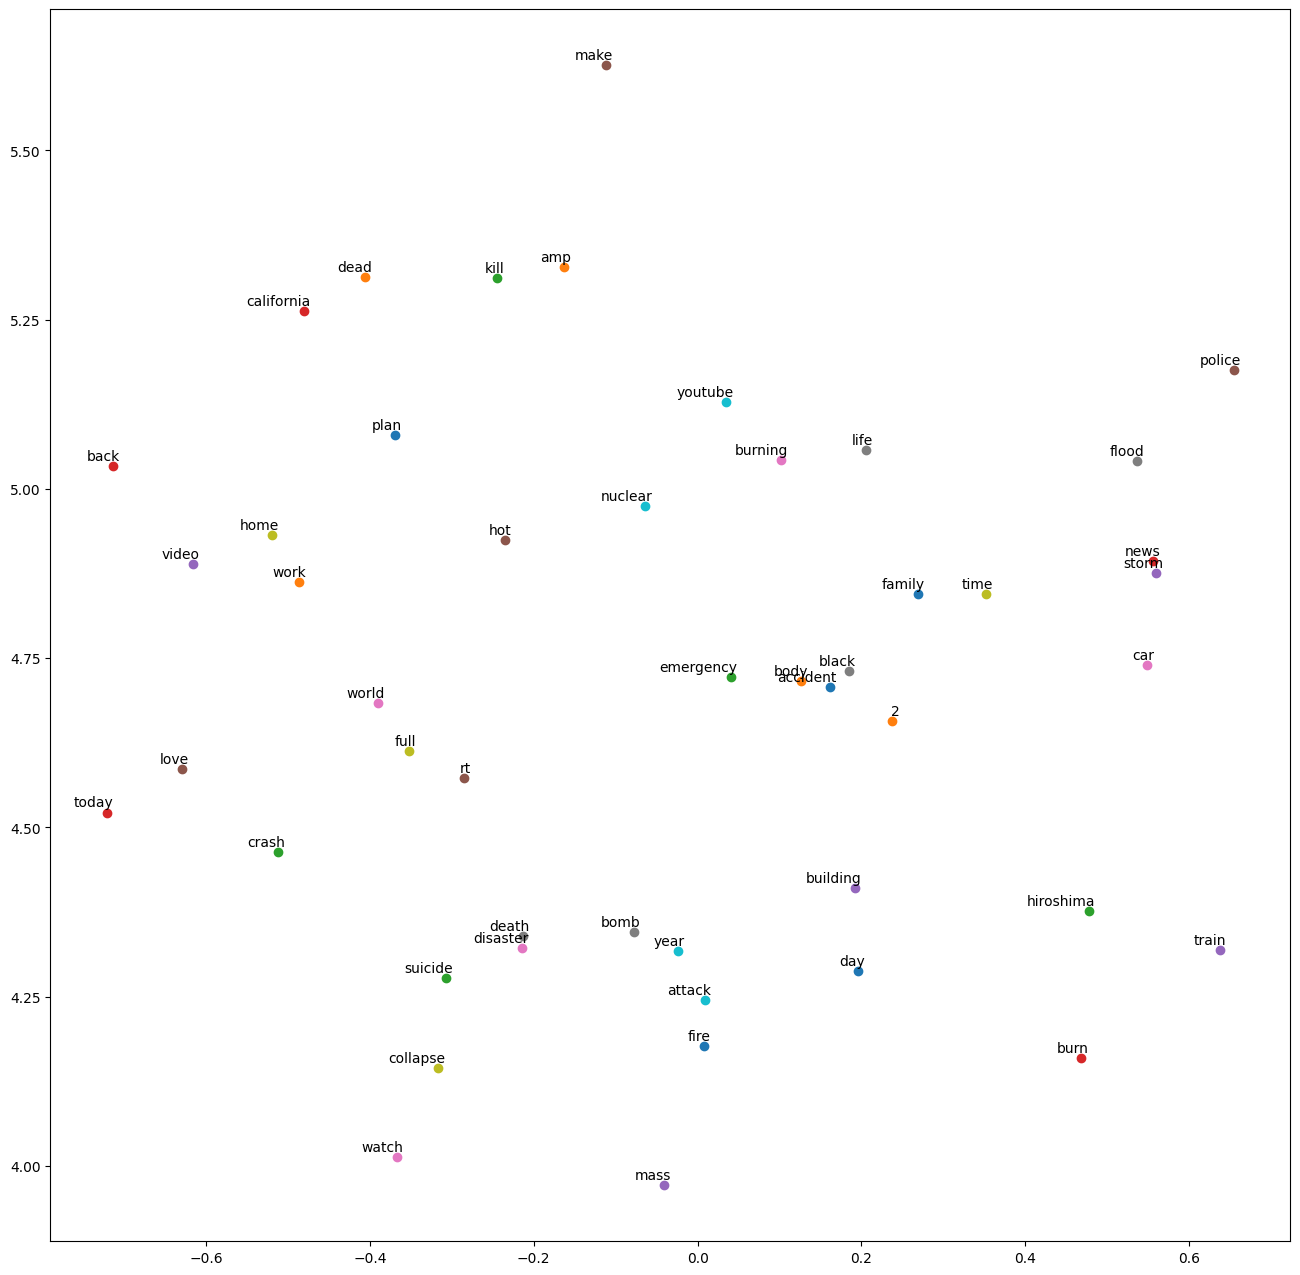

In [ ]:
tsne_plot(model)